# Healthcare Status Prediction: A Supervised Machine Learning Approach

## Data collection

In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['figure.figsize'] = (7, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
df = pd.read_csv('disease_train.csv')
df.head()

,id,age,gender,sick,pregnant,test_X1,test_X2,test_X3,test_X4,test_X5,test_X6,concern_type1,concern_type2,enlargement,tumor,disorder,medication_A,medication_B,mental_health,mood_stabiliser,surgery,treatment_type1,suspect,target
0,PA1001,59,male,no,no,7.8,NaN,89.0,0.85,105.0,NaN,no,yes,no,no,no,no,no,no,no,no,no,no,moderate_risk
1,PA1002,48,female,no,no,1.5,2.5,101.0,0.97,104.0,NaN,no,no,no,no,no,yes,no,no,yes,no,no,no,low_risk
2,PA1003,77,male,no,no,7.3,1.2,57.0,1.28,44.0,NaN,no,no,no,no,no,no,no,no,no,no,no,no,moderate_risk
3,PA1004,42,female,no,no,1.2,2.5,106.0,0.98,108.0,27.0,no,no,no,no,no,no,no,no,no,no,no,no,low_risk
4,PA1005,38,female,no,no,0.6,1.9,95.0,NaN,NaN,NaN,no,no,no,no,no,no,no,no,no,no,no,no,low_risk


In [3]:
df.dtypes

id                  object
age                  int64
gender              object
sick                object
pregnant            object
test_X1            float64
test_X2            float64
test_X3            float64
test_X4            float64
test_X5            float64
test_X6            float64
concern_type1       object
concern_type2       object
enlargement         object
tumor               object
disorder            object
medication_A        object
medication_B        object
mental_health       object
mood_stabiliser     object
surgery             object
treatment_type1     object
suspect             object
target              object
dtype: object

In [4]:
df.shape

(4250, 24)

In [5]:
df.describe()

,age,test_X1,test_X2,test_X3,test_X4,test_X5,test_X6
count,4250.000000,3839.000000,3007.000000,4034.000000,3858.000000,3863.000000,154.000000
mean,67.374824,7.342463,2.035580,104.919623,0.970846,110.090834,23.325974
std,1004.518821,32.657963,0.920404,35.496255,0.162474,39.837621,5.317032
min,1.000000,0.005000,0.050000,2.000000,0.250000,1.400000,8.400000
25%,37.000000,0.600000,1.600000,87.000000,0.870000,92.000000,20.000000
50%,55.000000,1.500000,1.900000,102.000000,0.960000,107.000000,24.000000
75%,67.000000,3.000000,2.300000,121.000000,1.060000,125.000000,27.000000
max,65526.000000,530.000000,18.000000,430.000000,1.960000,642.000000,45.000000


In [6]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [7]:
numeric_cols

['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5', 'test_X6']

In [8]:
categorical_cols

['id',
 'gender',
 'sick',
 'pregnant',
 'concern_type1',
 'concern_type2',
 'enlargement',
 'tumor',
 'disorder',
 'medication_A',
 'medication_B',
 'mental_health',
 'mood_stabiliser',
 'surgery',
 'treatment_type1',
 'suspect',
 'target']

## Exploratory Data Exploratory (EDA)

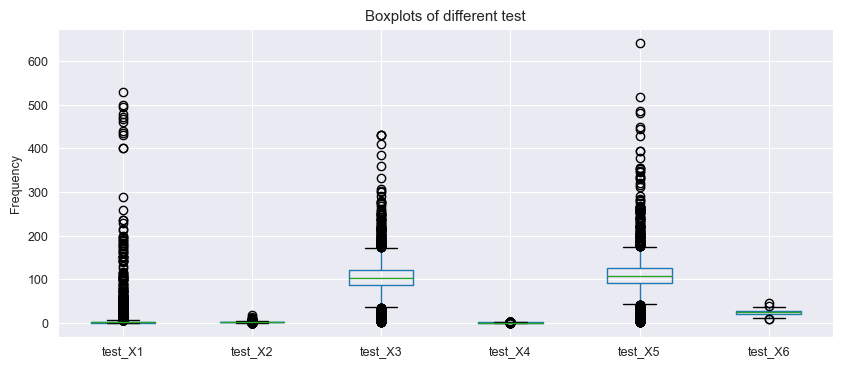

In [9]:
# Create boxplots for the different test
plt.figure(figsize=(10, 4))
df.boxplot(column=['test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5', 'test_X6' ])
plt.title('Boxplots of different test')
plt.ylabel('Frequency')
plt.show()

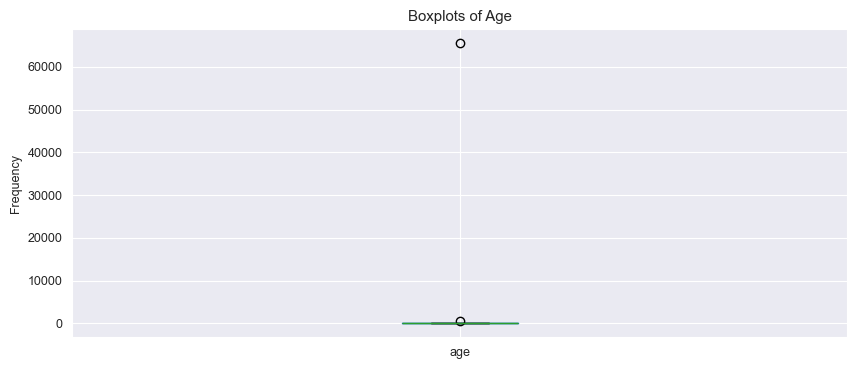

In [10]:
# Create boxplots for Age
plt.figure(figsize=(10, 4))
df.boxplot(column=['age'])
plt.title('Boxplots of Age')
plt.ylabel('Frequency')
plt.show()

In [11]:
# finding outliers in individual features
def find_outliers(df, columns):
    outliers_dict ={}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        outliers_dict[col] = {
            'outliers_df': outliers,
            'num_rows_affected': outliers.shape[0] # Number of rows affected by outliers
        }
    return outliers_dict

In [12]:
columns_to_check = ['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5', 'test_X6']
outliers_result = find_outliers(df, columns_to_check)

# Print the outliers for each column
for col, data in outliers_result.items():
    print(f"Influential Outliers for {col}:")
    print(f"Number of rows affected: {data['num_rows_affected']}\n")
    print(data['outliers_df'])
    print(f"\n")


Influential Outliers for age:
Number of rows affected: 2

          id    age  gender sick pregnant  test_X1  test_X2  test_X3  test_X4  \
2459  PA3460  65526  female   no       no      1.5      NaN    132.0     1.02   
3477  PA4478    455  female   no       no      1.1      2.0    118.0     1.13   

      test_X5  test_X6 concern_type1 concern_type2 enlargement tumor disorder  \
2459    129.0      NaN            no            no          no    no       no   
3477    104.0      NaN            no            no          no    no       no   

     medication_A medication_B mental_health mood_stabiliser surgery  \
2459           no           no            no              no      no   
3477           no           no            no              no      no   

     treatment_type1 suspect    target  
2459              no      no  low_risk  
3477              no      no  low_risk  


Influential Outliers for test_X1:
Number of rows affected: 480

          id  age  gender sick pregnant  test_X1

          id  age  gender sick pregnant     test_X1  test_X2  test_X3  \
12    PA1013   39  female   no       no    4.300000      2.4    135.0   
78    PA1079   77     NaN   no       no    2.200000      NaN     78.0   
147   PA1148   69  female   no       no   26.000000      2.0     89.0   
155   PA1156   29  female   no       no    4.300000      3.7    124.0   
157   PA1158   25  female   no      yes    0.800000      2.8    143.0   
204   PA1205   48  female   no       no    2.900000      2.2    146.0   
213   PA1214   66  female   no       no    2.100000      2.8    148.0   
277   PA1278   34  female   no       no    0.020000      2.3    122.0   
284   PA1285   36  female   no       no    2.100000      2.4    179.0   
301   PA1302   62  female   no       no    6.500000      NaN    110.0   
335   PA1336   67  female   no       no   10.000000      NaN    155.0   
397   PA1398   56    male   no       no    0.050000      0.7     50.0   
436   PA1437   41  female   no       no    9.400000

In [13]:
def find_outliers(df, columns):
    outliers_data = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        num_rows_affected = outliers.shape[0]
        outliers_ratio = num_rows_affected / df.shape[0] * 100  # Outliers ratio in percentage
        outlier_mean = outliers[col].mean() if num_rows_affected > 0 else None
        with_mean = df[col].mean()
        without_mean = df[col][~df.index.isin(outliers.index)].mean()
        outliers_data.append({
            'Column Name': col,
            'No. of Rows Affected': num_rows_affected,
            'Outliers Ratio (%)': outliers_ratio,
            'Outlier Mean': outlier_mean,
            'With Mean': with_mean,
            'Without Mean': without_mean
        })
    return pd.DataFrame(outliers_data)


columns_to_check = ['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5', 'test_X6']
outliers_df = find_outliers(df, columns_to_check)

# Print the DataFrame summarizing outliers information
outliers_df


,Column Name,No. of Rows Affected,Outliers Ratio (%),Outlier Mean,With Mean,Without Mean
0,age,2,0.047059,32990.500000,67.374824,51.874294
1,test_X1,480,11.294118,47.657708,7.342463,1.581428
2,test_X2,196,4.611765,3.393878,2.035580,1.940872
3,test_X3,224,5.270588,123.811429,104.919623,103.808924
4,test_X4,112,2.635294,1.244911,0.970846,0.962652
5,test_X5,238,5.600000,136.907101,110.090834,108.330207
6,test_X6,4,0.094118,25.050000,23.325974,23.280000


In [14]:
# Calculate IQR for Age 
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define outliers based on IQR
outliers_age = df[(df['age'] < Q1_age - 1.5 * IQR_age) | (df['age'] > Q3_age + 1.5 * IQR_age)]

# influential outliers
print("Influential Outliers for Age:")
outliers_age



Influential Outliers for Age:


,id,age,gender,sick,pregnant,test_X1,test_X2,test_X3,test_X4,test_X5,test_X6,concern_type1,concern_type2,enlargement,tumor,disorder,medication_A,medication_B,mental_health,mood_stabiliser,surgery,treatment_type1,suspect,target
2459,PA3460,65526,female,no,no,1.5,NaN,132.0,1.02,129.0,NaN,no,no,no,no,no,no,no,no,no,no,no,no,low_risk
3477,PA4478,455,female,no,no,1.1,2.0,118.0,1.13,104.0,NaN,no,no,no,no,no,no,no,no,no,no,no,no,low_risk


In [15]:
# Assuming df is your DataFrame
original_length = len(df)

# Drop rows with outliers for 'age'
df.drop(outliers_age.index, inplace=True)

# Check the length of the DataFrame after dropping rows
new_length = len(df)

In [16]:

# Print the original and new lengths
print(f"Original Length: {original_length}")
print(f"New Length after dropping rows with outliers: {new_length}")

# Check if any rows were removed
if new_length < original_length:
    print("Rows with outliers for 'age' have been successfully removed.")
else:
    print("No rows were removed.")


Original Length: 4250
New Length after dropping rows with outliers: 4248
Rows with outliers for 'age' have been successfully removed.


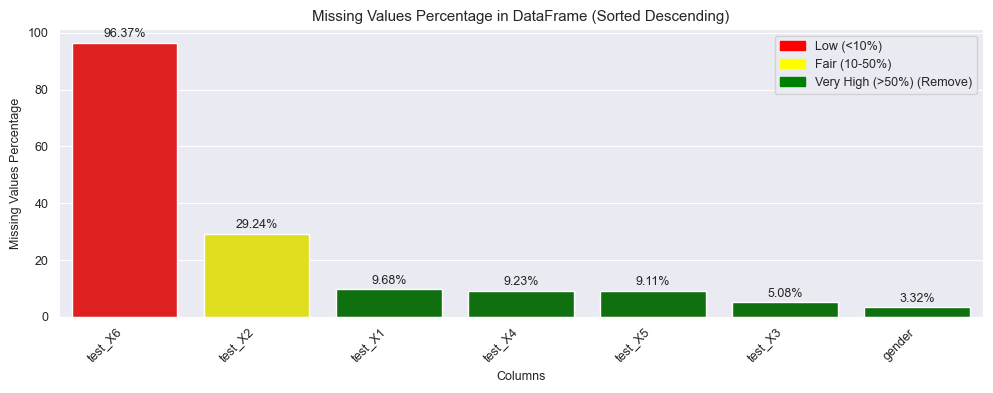

In [18]:

# Check for missing values
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Calculate missing values percentage
missing_values_percentage = (missing_values / len(df)) * 100

# Sort missing values percentage in descending order
missing_values_percentage_sorted = missing_values_percentage.sort_values(ascending=False)

# Categorize missing values percentages
categories = []
colors = []
for value in missing_values_percentage_sorted.values:
    if value <= 10:
        categories.append('Low (<10%)')
        colors.append('green')
    elif value <= 50:
        categories.append('Fair (10-50%)')
        colors.append('yellow')
    else:
        categories.append('Very High (>50%) (Remove)')
        colors.append('red')

# Plotting the sorted missing values with percentage on top of bars
plt.figure(figsize=(10, 4))
barplot = sns.barplot(x=missing_values_percentage_sorted.index, y=missing_values_percentage_sorted.values, palette=colors)
plt.xlabel('Columns')
plt.ylabel('Missing Values Percentage')
plt.title('Missing Values Percentage in DataFrame (Sorted Descending)')

# Annotate bars with percentage
for index, value in enumerate(missing_values_percentage_sorted.values):
    barplot.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

# Create legend based on categories
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels = ['Low (<10%)', 'Fair (10-50%)', 'Very High (>50%) (Remove)']
plt.legend(handles, labels)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [19]:
# Drop rows with missing values in the 'age' column
df = df.dropna(subset=['gender'])

In [20]:
## Cleaning
df.drop(['test_X6', 'id'], axis=1, inplace=True)

df.columns

Index(['age', 'gender', 'sick', 'pregnant', 'test_X1', 'test_X2', 'test_X3',
       'test_X4', 'test_X5', 'concern_type1', 'concern_type2', 'enlargement',
       'tumor', 'disorder', 'medication_A', 'medication_B', 'mental_health',
       'mood_stabiliser', 'surgery', 'treatment_type1', 'suspect', 'target'],
      dtype='object')

In [21]:
# check duplicate data
df.duplicated().sum()

39

In [22]:
# Assuming df is your DataFrame
df_no_duplicates = df.drop_duplicates()

# Print the updated DataFrame without duplicates
print("DataFrame without Duplicates:")
df_no_duplicates.shape

DataFrame without Duplicates:


(4068, 22)

In [23]:

# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

correlation_matrix

,age,test_X1,test_X2,test_X3,test_X4,test_X5
age,1.000000,-0.025925,-0.148892,-0.028222,-0.070262,0.007144
test_X1,-0.025925,1.000000,-0.219535,-0.361232,0.137084,-0.369559
test_X2,-0.148892,-0.219535,1.000000,0.643101,0.113794,0.616944
test_X3,-0.028222,-0.361232,0.643101,1.000000,0.224879,0.865724
test_X4,-0.070262,0.137084,0.113794,0.224879,1.000000,-0.246530
test_X5,0.007144,-0.369559,0.616944,0.865724,-0.246530,1.000000


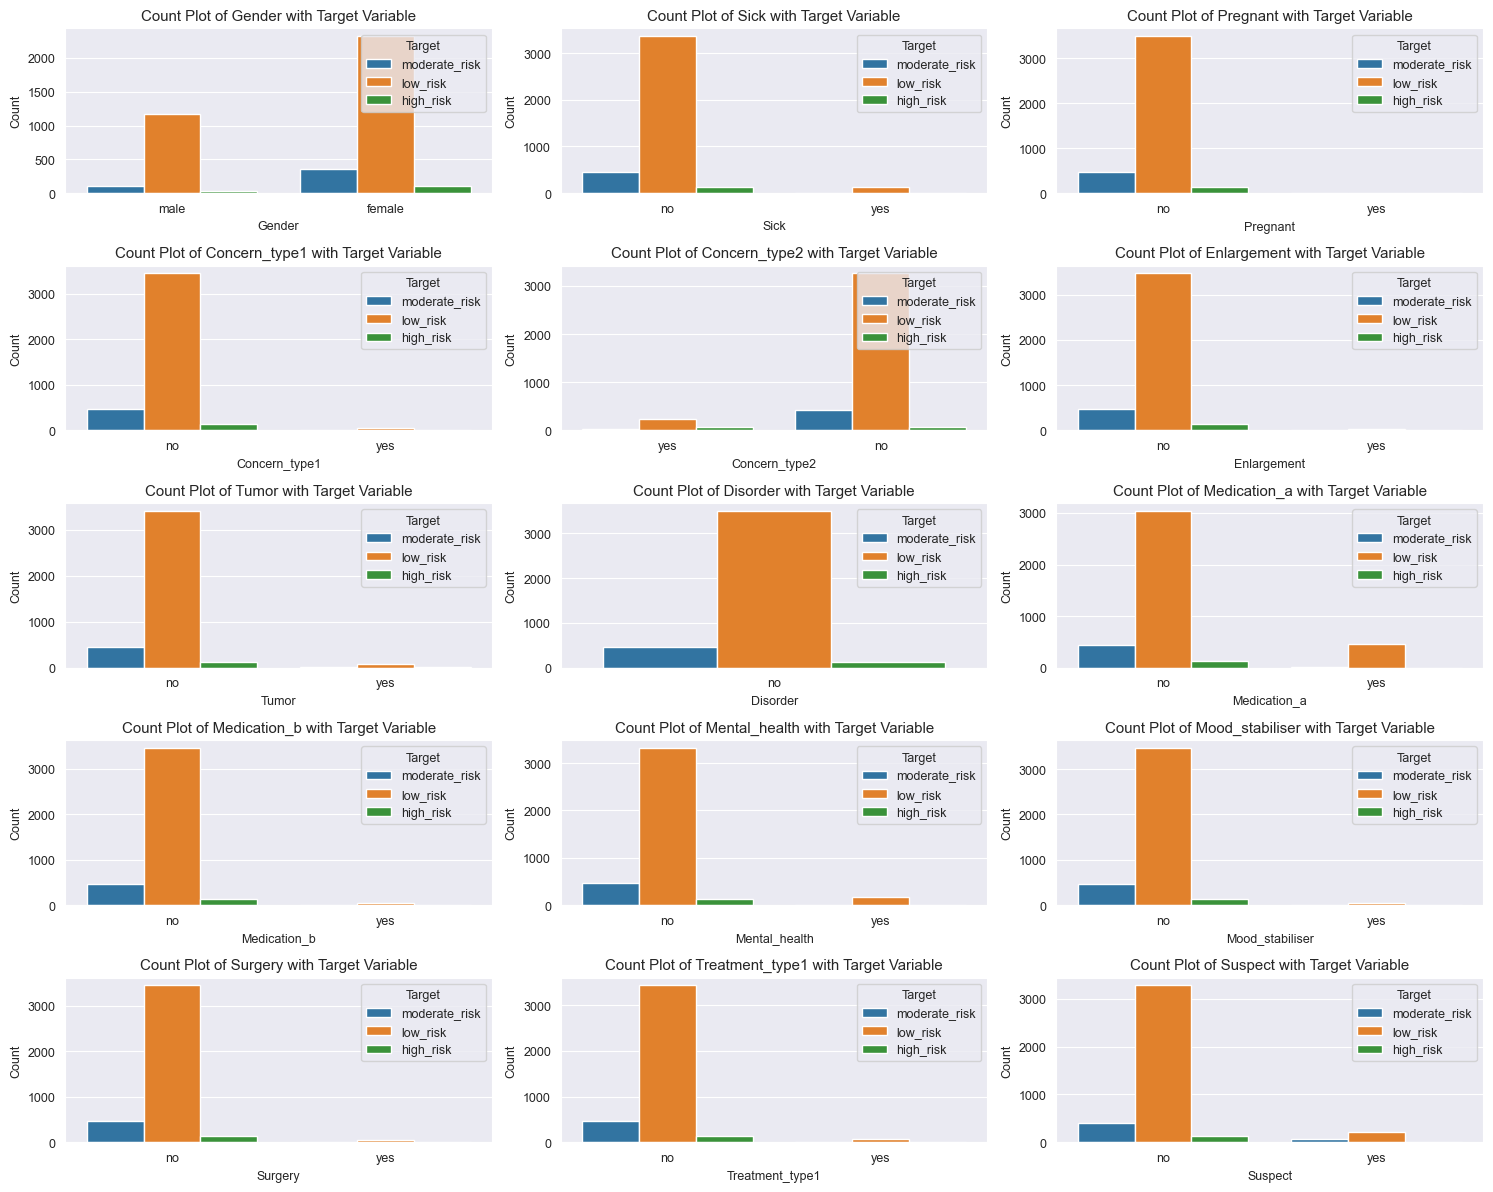

In [25]:

# List of categorical variables
categorical_vars = ['gender', 'sick', 'pregnant', 'concern_type1', 'concern_type2', 'enlargement', 'tumor', 
                    'disorder', 'medication_A', 'medication_B', 'mental_health', 'mood_stabiliser', 'surgery', 
                    'treatment_type1', 'suspect']

# Create a facet grid of count plots for each categorical variable with the target variable 'target'
plt.figure(figsize=(15, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=var, hue='target', data=df)
    plt.title(f'Count Plot of {var.capitalize()} with Target Variable')
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Target', loc='upper right')

plt.tight_layout()
plt.show()


## Data Preparation

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

### Training and Validation Sets

In [26]:
 from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
print('df_train.shape :', df_train.shape)
print('df_val.shape :', df_val.shape)

df_train.shape : (3285, 22)
df_val.shape : (822, 22)


### Input and Target Columns

Let's identify the input and target columns.

In [28]:
input_cols = list(df_train.columns)[1:-1]
target_col = 'target'

In [29]:
train_inputs = df_train[input_cols].copy()
train_targets = df_train[target_col].copy()

In [30]:
val_inputs = df_val[input_cols].copy()
val_targets = df_val[target_col].copy()

In [31]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [32]:
numeric_cols

['test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5']

In [33]:
categorical_cols

['gender',
 'sick',
 'pregnant',
 'concern_type1',
 'concern_type2',
 'enlargement',
 'tumor',
 'disorder',
 'medication_A',
 'medication_B',
 'mental_health',
 'mood_stabiliser',
 'surgery',
 'treatment_type1',
 'suspect']

### Imputing missing numeric values

In [34]:
df.isna().sum().sort_values(ascending = False)

test_X2            1203
test_X1             396
test_X4             377
test_X5             372
test_X3             206
age                   0
medication_A          0
suspect               0
treatment_type1       0
surgery               0
mood_stabiliser       0
mental_health         0
medication_B          0
enlargement           0
disorder              0
tumor                 0
gender                0
concern_type2         0
concern_type1         0
pregnant              0
sick                  0
target                0
dtype: int64

### Imputing missing numeric values

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
imputer = SimpleImputer(strategy = 'mean').fit(df[numeric_cols])

In [37]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])

In [38]:
train_inputs[numeric_cols].isna().sum()

test_X1    0
test_X2    0
test_X3    0
test_X4    0
test_X5    0
dtype: int64

## Encoding Categorical Data

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[categorical_cols])

In [41]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [42]:
encoded_cols

['gender_female',
 'gender_male',
 'sick_no',
 'sick_yes',
 'pregnant_no',
 'pregnant_yes',
 'concern_type1_no',
 'concern_type1_yes',
 'concern_type2_no',
 'concern_type2_yes',
 'enlargement_no',
 'enlargement_yes',
 'tumor_no',
 'tumor_yes',
 'disorder_no',
 'medication_A_no',
 'medication_A_yes',
 'medication_B_no',
 'medication_B_yes',
 'mental_health_no',
 'mental_health_yes',
 'mood_stabiliser_no',
 'mood_stabiliser_yes',
 'surgery_no',
 'surgery_yes',
 'treatment_type1_no',
 'treatment_type1_yes',
 'suspect_no',
 'suspect_yes']

In [43]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [44]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

## Model Selection

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc
from sklearn.model_selection import GridSearchCV

In [46]:
model_dict = {}
model_dict['KNN classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=42)
model_dict['Ada Boost Classifier'] = AdaBoostClassifier(random_state=42)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=42)

In [47]:
def model_test(X_train, X_val, train_targets, val_targets, model, model_name):
    model.fit(X_train, train_targets)
    train_acc = model.score(X_train, train_targets)
    val_acc  = model.score(X_val, val_targets)
    print('============== {} =========='.format(model_name))
    print('Training Accuracy is: {}'.format(train_acc))
    print('Validation Accuracy is: {}'.format(val_acc))
    print()

In [48]:
for model_name, model in model_dict.items():
    model_test(X_train, X_val, train_targets, val_targets, model, model_name)

============== KNN classifier ==========
Training Accuracy is: 0.95220700152207
Validation Accuracy is: 0.9501216545012166

============== Decision Tree Classifier ==========
Training Accuracy is: 1.0
Validation Accuracy is: 0.9817518248175182



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


============== Ada Boost Classifier ==========
Training Accuracy is: 0.9619482496194824
Validation Accuracy is: 0.9574209245742092

============== Gradient Boosting Classifier ==========
Training Accuracy is: 1.0
Validation Accuracy is: 0.9927007299270073



### Tuning Gradient Boosting Classifier

In [49]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

In [50]:
# Hyperparameter tuning using GridSearchCV
gb_param_grid = {
    'n_estimators': [int(x) for x in np.linspace(1, 200, 5)],
    'learning_rate': [(0.97 + x/100) for x in range (0,8)],
    'max_depth': [3, 5, 7]
}

In [51]:
%%time
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1)
gb_grid_search.fit(X_train, train_targets)

CPU times: total: 4.31 s
Wall time: 3min 49s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [1, 50, 100, 150, 200]})

In [52]:
# Best hyperparameters and corresponding accuracy
print("Best Parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best Accuracy for Gradient Boosting:", gb_grid_search.best_score_)


Best Parameters for Gradient Boosting: {'learning_rate': 0.98, 'max_depth': 7, 'n_estimators': 50}
Best Accuracy for Gradient Boosting: 0.984779299847793


In [53]:
gb_grid_search.best_score_

0.984779299847793

In [54]:
gb_tuned = GradientBoostingClassifier(learning_rate = 0.1, 
                               random_state=42, 
                               max_depth=7,
                               n_estimators=50)

In [55]:
gb_tuned.fit(X_train, train_targets)

GradientBoostingClassifier(max_depth=7, n_estimators=50, random_state=42)

In [56]:
y_pred = gb_tuned.predict(X_val)
print('Accuracy of Gradient Boosting Classifier (tuned) = ', 
     accuracy_score(y_pred, val_targets))

Accuracy of Gradient Boosting Classifier (tuned) =  0.9878345498783455


## Classification Report

In [57]:
print(classification_report(val_targets, y_pred))

               precision    recall  f1-score   support

    high_risk       0.96      0.85      0.90        26
     low_risk       0.99      1.00      0.99       700
moderate_risk       0.98      0.97      0.97        96

     accuracy                           0.99       822
    macro avg       0.98      0.94      0.95       822
 weighted avg       0.99      0.99      0.99       822



## Conclusion

> - Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It is calculated as $$\dfrac{TP}{(TP + FP)}$$ The precision scores for high_risk, low_risk, and moderate_risk are `0.96`, `0.99`, and `0.98`, respectively. These scores indicate a high level of precision in predicting each class, with particularly strong precision for low_risk and moderate_risk.



> - Recall (Sensitivity): Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. It is calculated as $$\dfrac{TP}{(TP + FN)}$$ The recall scores for high_risk, low_risk, and moderate_risk are 0.85, 1.00, and 0.97, respectively. These scores show a high recall rate for low_risk and moderate_risk, indicating that the model effectively identifies these classes.


> - The F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. It is calculated as $$\dfrac{2 \times (Precision \times Recall)}{(Precision + Recall)}$$ The F1-scores for high_risk, low_risk, and moderate_risk are `0.90`, `0.99`, and `0.97`, respectively. These scores indicate a good balance between precision and recall for each class.

> - Accuracy: The overall accuracy of the model is `0.99`, which is very high and indicates that the model performs well across all classes.

